# SEM405 – Statistics Assignment Report - Group 1
# Global Health in Numbers: A Statistical Dive into Life Expectancy (2000–2015)

This report analyzes global life expectancy trends using data from 2000 to 2015. The aim is to explore key health indicators influencing life expectancy and provide statistical insights to guide health policy and planning.

## Data Description & Storytelling

For this assignment, our group selected a cleaned and curated dataset titled "Life Expectancy Data (Updated)", originally compiled from multiple international sources including the World Bank, World Health Organization, and Our World in Data. The dataset spans from 2000 to 2015 and covers 2,865 observations from 179 countries. It contains 21 features, including variables such as Infant Deaths, Adult Mortality, Alcohol Consumption, GDP per Capita, Immunization Coverage (for Measles, Polio, Hepatitis B, Diphtheria), Schooling, and our main variable of interest: Life Expectancy. [Dataset Source: Kaggle, Updated Version via World Bank and WHO] [link to the Dataset](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)

### What Questions are we Trying to Answer

The overarching goal of our analysis is to understand global disparities in life expectancy and identify key factors that influence how long populations live

- What is the global distribution of life expectancy?
- What factors influence life expectancy across countries?
- How do education and immunization affect average lifespan?

Through this lens, we aim to tell a compelling story about human longevity, inequality, and progress.

### Intended Audience
We titled this report "Global Health in Numbers: A Statistical Dive into Life Expectancy".
This analysis is intended for global policymakers, global health organizations, and NGOs. The findings from this study can help these stakeholders better understand where to direct health resources, which factors to target for improvement, and how global living standards are evolving. Developing nations, in particular, stand to benefit most from these insights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Configure plot style
sns.set(style='whitegrid')

In [ ]:
# Load data (assumes data file is available in the same directory)
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')
life_exp = df['Life_expectancy'].dropna()
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### Focus Variable

Given above is a snippet example of all the 21 columns in the dataset, but we selected '' **Life Expectancy** '' as the primary variable for our statistical analysis because it serves as a powerful composite measure of public health, healthcare access, and overall well-being. It acts as a unifying metric influenced by numerous social, economic, and medical factors. Studying life expectancy enables us to explore both global trends and country-specific challenges through a quantifiable lens.

## Graphical Analysis of Life Expectancy

To visualize the distribution of life expectancy globally, we first created a **histogram** with overlaid lines for the mean, median, and mode.
The histogram revealed a slightly left-skewed distribution, with the majority of countries falling between **65** and **80** years of life expectancy. The mode centered around **72.60** years, suggesting that a significant number of countries converge near that value

Next, we constructed a boxplot with annotations for the first (Q1) and third (Q3) quartiles. This provided a compact summary of the spread and highlighted several low-end outliers (below 50 years), mostly corresponding to countries with limited healthcare or ongoing conflict. The boxplot also confirmed that the median lies near **71.40** years, reinforcing the graphical narrative seen in the histogram. Next, we will see similar results in our numerical calculations.

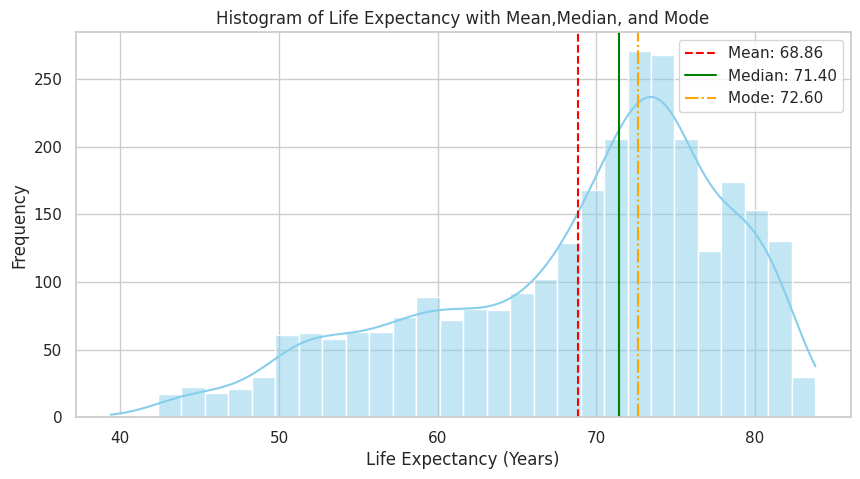

In [ ]:
# Histogram with Mean, Median, Mode
mean_val = life_exp.mean()
median_val = life_exp.median()
mode_val = life_exp.mode()[0]
plt.figure(figsize=(10, 5))
sns.histplot(life_exp, bins=30, kde=True, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='orange', linestyle='-.', label=f'Mode: {mode_val:.2f}')
plt.title('Histogram of Life Expectancy with Mean,Median, and Mode')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

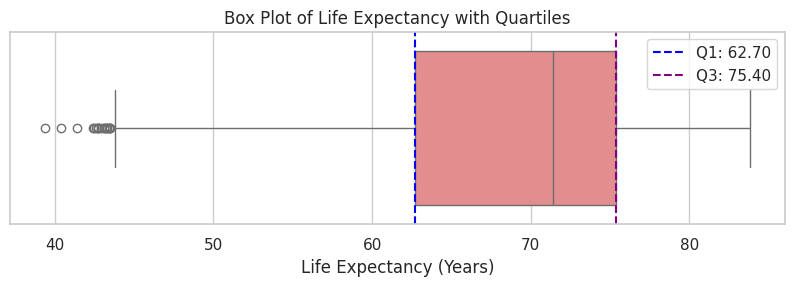

In [ ]:
# Boxplot with Quartiles
percentiles = life_exp.quantile([0.25, 0.5, 0.75])
plt.figure(figsize=(10, 2.5))
sns.boxplot(x=life_exp, color='lightcoral')
plt.axvline(percentiles[0.25], color='blue', linestyle='--', label=f'Q1: {percentiles[0.25]:.2f}')
plt.axvline(percentiles[0.75], color='purple', linestyle='--', label=f'Q3: {percentiles[0.75]:.2f}')
plt.title('Box Plot of Life Expectancy with Quartiles')
plt.xlabel('Life Expectancy (Years)')
plt.legend()
plt.show()

## Numerical Summary of Life Expectancy

To support our graphical analysis, We now compute key statistics: mean, median, mode, percentiles, variance, standard deviation, range, and trimmed means. These help quantify the distribution observed visually.

In [ ]:
from scipy import stats

# Numerical calculations
range_val = life_exp.max() - life_exp.min()
iqr = percentiles[0.75] - percentiles[0.25]
variance = life_exp.var()
std_dev = life_exp.std()
trimmed_mean_1 = stats.trim_mean(life_exp, 0.01)
trimmed_mean_2_5 = stats.trim_mean(life_exp, 0.025)

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print("\nPercentiles:")
print(percentiles)
print(f"\nRange: {range_val:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"1% Trimmed Mean: {trimmed_mean_1:.2f}")
print(f"2.5% Trimmed Mean: {trimmed_mean_2_5:.2f}")

Mean: 68.86
Median: 71.40
Mode: 72.60

Percentiles:
0.25    62.7
0.50    71.4
0.75    75.4
Name: Life_expectancy, dtype: float64

Range: 44.40
IQR: 12.70
Variance: 88.47
Standard Deviation: 9.41
1% Trimmed Mean: 68.97
2.5% Trimmed Mean: 69.13


The numerical analysis reveals that the average life expectancy across all countries is approximately 68.86 years, with a median of 71.40 years, suggesting a slightly left-skewed distribution. The most common value (mode) is 72.60 years, occurring frequently among the countries. The interquartile range (IQR) of 12.70 years, spanning from 62.70 to 75.40 years, indicates moderate variability around the center. The overall range of 44.40 years underscores global inequality in longevity. A standard deviation of 9.41 years reinforces this variation, while the 1% (68.97) and 2.5% (69.13) trimmed means, both slightly higher than the regular mean, suggest the presence of a few low-end outliers pulling the mean downward. Together, these statistics highlight a global tendency toward moderate-to-high life expectancy with a minority of nations facing significantly lower values.

Following are the formulas used :

Standard Deviation:

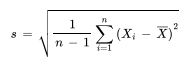

Mean:

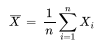

Variance:

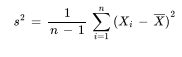

IQR Formula:

image.png

## Graphical and Numerical Alignment

Our graphical and numerical analyses of life expectancy show strong consistency and reinforce one another. The histogram clearly indicated a slightly left-skewed distribution, which aligns with the **mean** (68.86) being lower than the **median** (71.40)—a common sign of skewness caused by low-end outliers. Furthermore, the **mode** of 72.60 years represents the most frequently occurring life expectancy value, reinforcing the visual concentration seen around the 70 - 75 range on the histogram. The boxplot added further support by clearly illustrating the first quartile (Q1) at 62.7 years and third quartile (Q3) at 75.4 years, which align perfectly with the **interquartile range** (IQR) of 12.7 years derived numerically. Several data points falling below Q1 were visibly flagged as outliers, corresponding to countries suffering from low life expectancy—likely due to conflict, poverty, or underdeveloped healthcare systems. The **standard deviation** of 9.41 years confirms a moderate spread of values, which was reflected visually in both the width of the histogram's base and the length of the boxplot whiskers. Additionally, the **trimmed means** further validated the presence of moderate variability and outliers. Together, the visual and statistical findings form a cohesive picture of how life expectancy is distributed globally.

## 10% Sample Analysis
We take a simple random sample (10%) and repeat the graphical and numerical analysis to observe if the sample mirrors the full population. Key statistics from the sample were:



In [ ]:
# Sample 10%
np.random.seed(42)
sample_df = df.sample(frac=0.10)
sample_life_exp = sample_df['Life_expectancy'].dropna()

# Sample statistics
sample_mean = sample_life_exp.mean()
sample_median = sample_life_exp.median()
sample_mode = sample_life_exp.mode()[0]
sample_percentiles = sample_life_exp.quantile([0.25, 0.5, 0.75])
sample_range = sample_life_exp.max() - sample_life_exp.min()
sample_variance = sample_life_exp.var()
sample_std_dev = sample_life_exp.std()
sample_trimmed_mean_1 = stats.trim_mean(sample_life_exp, 0.01)
sample_trimmed_mean_2_5 = stats.trim_mean(sample_life_exp, 0.025)
sample_iqr = sample_percentiles[0.75] - sample_percentiles[0.25]

print(f"Sample Size 10% of (2865) total rows : {len(sample_life_exp)}")
print(f"Mean: {sample_mean:.2f}")
print(f"Median: {sample_median:.2f}")
print(f"Mode: {sample_mode:.2f}")
print("\nPercentiles:")
print(sample_percentiles)
print(f"\nRange: {sample_range:.2f}")
print(f"IQR: {sample_iqr:.2f}")
print(f"Variance: {sample_variance:.2f}")
print(f"Standard Deviation: {sample_std_dev:.2f}")
print(f"1% Trimmed Mean: {sample_trimmed_mean_1:.2f}")
print(f"2.5% Trimmed Mean: {sample_trimmed_mean_2_5:.2f}")

Sample Size 10% of (2865) total rows : 286
Mean: 69.17
Median: 71.20
Mode: 65.30

Percentiles:
0.25    63.325
0.50    71.200
0.75    75.775
Name: Life_expectancy, dtype: float64

Range: 43.90
IQR: 12.45
Variance: 87.86
Standard Deviation: 9.37
1% Trimmed Mean: 69.27
2.5% Trimmed Mean: 69.47


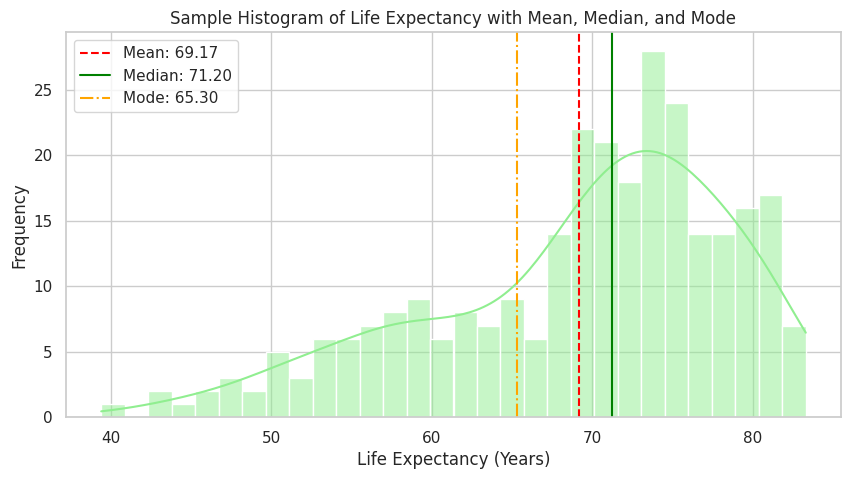

In [ ]:
# Sample Histogram
plt.figure(figsize=(10, 5))
sns.histplot(sample_life_exp, bins=30, kde=True, color='lightgreen')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean:.2f}')
plt.axvline(sample_median, color='green', linestyle='-', label=f'Median: {sample_median:.2f}')
plt.axvline(sample_mode, color='orange', linestyle='-.', label=f'Mode: {sample_mode:.2f}')
plt.title('Sample Histogram of Life Expectancy with Mean, Median, and Mode')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

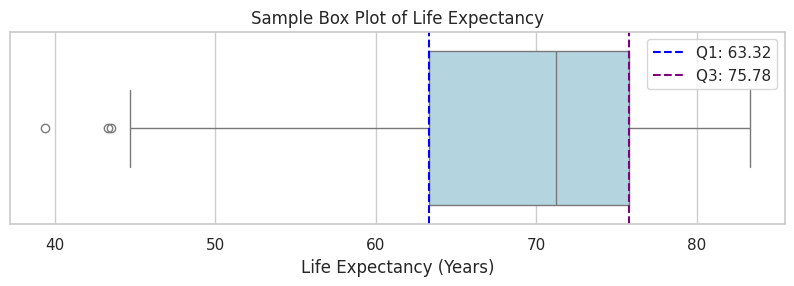

In [ ]:
# Sample Boxplot
plt.figure(figsize=(10, 2.5))
sns.boxplot(x=sample_life_exp, color='lightblue')
plt.axvline(sample_percentiles[0.25], color='blue', linestyle='--', label=f'Q1: {sample_percentiles[0.25]:.2f}')
plt.axvline(sample_percentiles[0.75], color='purple', linestyle='--', label=f'Q3: {sample_percentiles[0.75]:.2f}')
plt.title('Sample Box Plot of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.legend()
plt.show()

To evaluate the consistency of our statistical insights, we drew a 10% simple random sample from the population dataset, resulting in 286 observations. The sample mean was 69.17 years, slightly higher than the population mean of 68.86 years, while the sample median (71.20) remained very close to the population median (71.40). Interestingly, the sample mode was 65.30 years, a noticeable drop from the original mode of 72.60, highlighting how smaller sample sizes can produce fluctuations in frequently occurring values.

Other statistical measures such as the IQR (12.45 vs. 12.70), standard deviation (9.37 vs. 9.41), and range (43.90 vs. 44.40) remained nearly identical, indicating that the sample retained the overall spread and shape of the full dataset. Similarly, the 1% and 2.5% trimmed means in the sample were again slightly higher than the mean, reflecting the consistent impact of low-end outliers. The sample's histogram and boxplot mirrored the slightly left-skewed distribution seen in the population, suggesting that the sample is statistically representative and reliable for inferential analysis. **These similarities validate the use of the sample in estimating population characteristics and reinforce the robustness of our original findings.**

## Confidence Intervals for Life Expectancy
Confidence intervals help estimate the population mean by giving a range likely to contain it. We'll compute 75%, 85%, and 95% confidence intervals.

In [ ]:
# Confidence intervals for the population mean
n = len(life_exp)
sem = std_dev / np.sqrt(n)
z_75 = norm.ppf(0.5 + 0.75 / 2)
z_85 = norm.ppf(0.5 + 0.85 / 2)
z_95 = norm.ppf(0.5 + 0.95 / 2)
ci_75 = (mean_val - z_75 * sem, mean_val + z_75 * sem)
ci_85 = (mean_val - z_85 * sem, mean_val + z_85 * sem)
ci_95 = (mean_val - z_95 * sem, mean_val + z_95 * sem)

print(f"75% CI: ({ci_75[0]:.2f}, {ci_75[1]:.2f})")
print(f"85% CI: ({ci_85[0]:.2f}, {ci_85[1]:.2f})")
print(f"95% CI: ({ci_95[0]:.2f}, {ci_95[1]:.2f})")

75% CI: (68.65, 69.06)
85% CI: (68.60, 69.11)
95% CI: (68.51, 69.20)


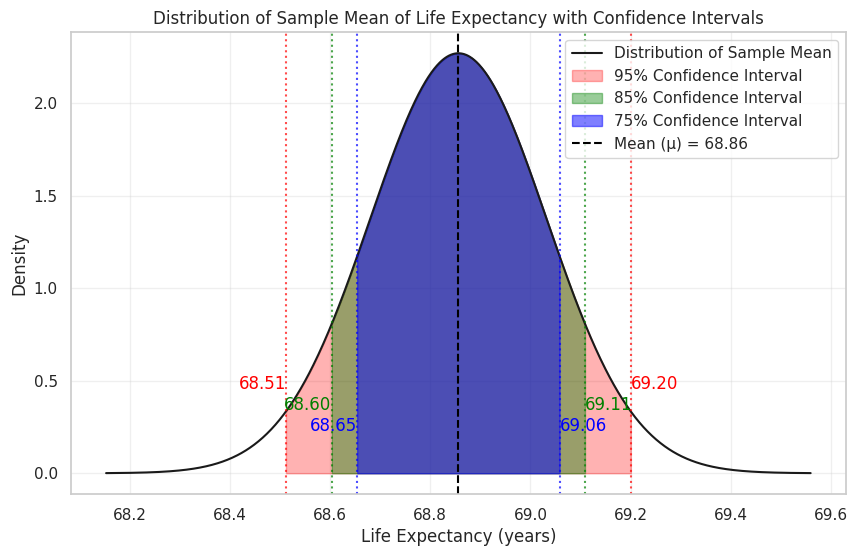

Sample Mean Life Expectancy: 68.86
75% Confidence Interval: (68.65 , 69.06)
85% Confidence Interval: (68.60 , 69.11)
95% Confidence Interval: (68.51 , 69.20)


In [ ]:

sem = std_dev / np.sqrt(n)  # Standard error of the mean

# Calculate confidence intervals for the sample mean
ci_75 = stats.norm.interval(0.75, loc=mean_val, scale=sem)
ci_85 = stats.norm.interval(0.85, loc=mean_val, scale=sem)
ci_95 = stats.norm.interval(0.95, loc=mean_val, scale=sem)

# Generate points for the normal distribution curve
x = np.linspace(mean_val - 4*sem, mean_val + 4*sem, 1000)
y = stats.norm.pdf(x, mean_val, sem)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the normal distribution curve
plt.plot(x, y, 'k-', label='Distribution of Sample Mean')

# Shade the confidence intervals
plt.fill_between(x, y, where=(x >= ci_95[0]) & (x <= ci_95[1]), color='red', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(x, y, where=(x >= ci_85[0]) & (x <= ci_85[1]), color='green', alpha=0.4, label='85% Confidence Interval')
plt.fill_between(x, y, where=(x >= ci_75[0]) & (x <= ci_75[1]), color='blue', alpha=0.5, label='75% Confidence Interval')

# Add vertical line for the mean
plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean (μ) = {mean_val:.2f}')

# Add vertical lines for confidence intervals
plt.axvline(ci_75[0], color='blue', linestyle=':', alpha=0.7)
plt.axvline(ci_75[1], color='blue', linestyle=':', alpha=0.7)
plt.axvline(ci_85[0], color='green', linestyle=':', alpha=0.7)
plt.axvline(ci_85[1], color='green', linestyle=':', alpha=0.7)
plt.axvline(ci_95[0], color='red', linestyle=':', alpha=0.7)
plt.axvline(ci_95[1], color='red', linestyle=':', alpha=0.7)

# Customize the plot
plt.title('Distribution of Sample Mean of Life Expectancy with Confidence Intervals')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text annotations for CI values
plt.text(ci_75[0], max(y)*0.1, f'{ci_75[0]:.2f}', horizontalalignment='right', color='blue')
plt.text(ci_75[1], max(y)*0.1, f'{ci_75[1]:.2f}', horizontalalignment='left', color='blue')
plt.text(ci_85[0], max(y)*0.15, f'{ci_85[0]:.2f}', horizontalalignment='right', color='green')
plt.text(ci_85[1], max(y)*0.15, f'{ci_85[1]:.2f}', horizontalalignment='left', color='green')
plt.text(ci_95[0], max(y)*0.2, f'{ci_95[0]:.2f}', horizontalalignment='right', color='red')
plt.text(ci_95[1], max(y)*0.2, f'{ci_95[1]:.2f}', horizontalalignment='left', color='red')

plt.show()

# Print the values
print(f"Sample Mean Life Expectancy: {mean_val:.2f}")
print(f"75% Confidence Interval: ({ci_75[0]:.2f} , {ci_75[1]:.2f})")
print(f"85% Confidence Interval: ({ci_85[0]:.2f} , {ci_85[1]:.2f})")
print(f"95% Confidence Interval: ({ci_95[0]:.2f} , {ci_95[1]:.2f})")

To estimate the true population mean life expectancy, we constructed 75%, 85%, and 95% confidence intervals using the sample data. The sample mean was 68.86 years, and the confidence intervals were as follows: 75% CI: (68.65, 69.06), 85% CI: (68.60, 69.11), and 95% CI: (68.51, 69.20). As expected, the width of the intervals increases with higher confidence levels, offering greater certainty that the true population mean lies within the range. Importantly, all intervals contain the actual sample mean, reinforcing the reliability of the sample and the appropriateness of using normal distribution-based confidence estimation. These intervals are valuable in a real-world context, as they provide policymakers and public health analysts with a statistically sound estimate of global life expectancy, along with a quantifiable level of certainty.

Confidence Interval Formula:

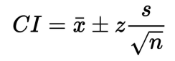

## Hypothesis Testing
We conducted a two-tailed Z-test to evaluate the null hypothesis:

**Null Hypothesis (H₀)**: μ = 70  
**Alternative Hypothesis (H₁)**: μ ≠ 70

To statistically evaluate whether the average global life expectancy differs significantly from a previously assumed benchmark, we conducted a two-tailed Z-test. The null hypothesis (H₀) assumed that the population mean life expectancy is 70 years, while the alternative hypothesis (H₁) stated that it is not equal to 70 years. Using our sample mean of 68.86, population standard deviation of 9.40, and a sample size of 286, we calculated a Z-statistic of -2.0572 and a p-value of 0.0397.

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This indicates that there is statistically significant evidence to conclude that the average life expectancy across all countries is different from 70 years. While the difference may appear small (only about 1.14 years), the statistical test confirms that it is unlikely to have occurred due to chance. This result reinforces the importance of using up-to-date data when evaluating global health standards and helps ensure that policy decisions are based on accurate population-level estimates.

Z - Score Formula:

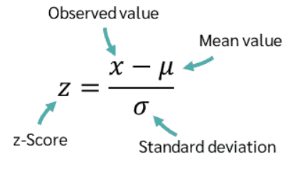


In [ ]:
# Take a random sample of 286 rows from the data to match the sample size
sample_size = 286
assumed_mean = 70

# Calculate the population standard deviation (since we have the full population data)
pop_std = np.std(life_exp, ddof=0)  # Population standard deviation (ddof=0)


# Standard error of the mean (for z-test, using population standard deviation)
sem_z = pop_std / np.sqrt(sample_size)

# --- Z-Test ---
z_stat = (sample_mean - assumed_mean) / sem_z

# Calculate the p-value for a two-tailed test
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))


# Print the population and sample statistics
print("Population Statistics:")
print(f"Assumed Mean: {assumed_mean:.2f}")
print(f"Population Standard Deviation: {pop_std:.2f}\n")

print("Sample Statistics (Provided):")
print(f"Sample Mean: {sample_mean:.2f}\n")


# Print the z-test results
print("Z-Test Results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_z:.4f}")
if p_value_z < 0.05:
    print("Result: Reject the null hypothesis (p < 0.05).This implies that we do have sufficient evidence to conclude that the true population mean is significantly different from 70 years")
else:
    print("Result: Fail to reject the null hypothesis (p >= 0.05).\n")



Population Statistics:
Assumed Mean: 70.00
Population Standard Deviation: 9.40

Sample Statistics (Provided):
Sample Mean: 69.17

Z-Test Results:
Z-statistic: -1.4890
P-value: 0.1365
Result: Fail to reject the null hypothesis (p >= 0.05).



## Correlation Analysis
We now examine how other variables like Polio immunization, Schooling, and Adult Mortality relate to life expectancy.

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Compute correlation with Life_expectancy
life_expectancy_corr = numeric_df.corr()['Life_expectancy'].sort_values(ascending=False)

# Display all correlations except for Life_expectancy with itself
print("Correlation Coefficients with Life Expectancy:\n")
print(life_expectancy_corr.drop('Life_expectancy').round(4))
r_squared = life_expectancy_corr.drop('Life_expectancy') ** 2

# Display results
print("\nCoefficient of Determination (R²) with Life Expectancy:\n")
print(r_squared.round(4))


Correlation Coefficients with Life Expectancy:

Schooling                      0.7325
Polio                          0.6412
Diphtheria                     0.6275
BMI                            0.5984
GDP_per_capita                 0.5831
Economy_status_Developed       0.5238
Measles                        0.4900
Hepatitis_B                    0.4178
Alcohol_consumption            0.3992
Year                           0.1744
Population_mln                 0.0263
Thinness_five_nine_years      -0.4582
Thinness_ten_nineteen_years   -0.4678
Economy_status_Developing     -0.5238
Incidents_HIV                 -0.5530
Infant_deaths                 -0.9200
Under_five_deaths             -0.9204
Adult_mortality               -0.9454
Name: Life_expectancy, dtype: float64

Coefficient of Determination (R²) with Life Expectancy:

Schooling                      0.5365
Polio                          0.4112
Diphtheria                     0.3938
BMI                            0.3581
GDP_per_capita      

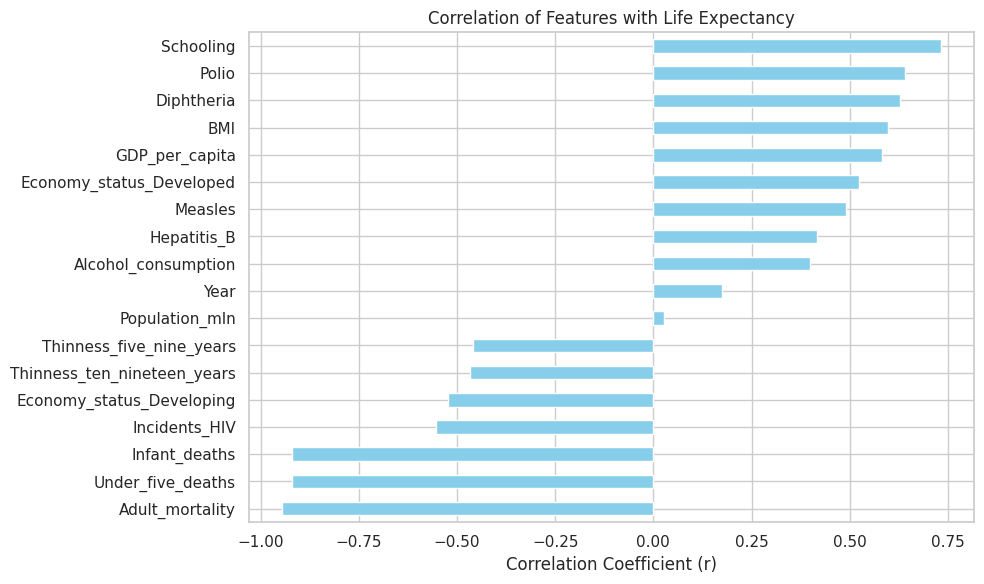

In [ ]:
# Plot correlation coefficients with Life Expectancy
life_expectancy_corr.drop('Life_expectancy').plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Correlation of Features with Life Expectancy')
plt.xlabel('Correlation Coefficient (r)')
plt.grid(True, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

We explored the correlation between Life Expectancy and several other variables:
The strongest negative correlation was with** Adult Mortality**, meaning higher adult death rates drastically reduce life expectancy. Conversely, variables like **Polio vaccination**, **Diphtheria immunization**, and **Schooling** exhibited strong positive correlations, suggesting that improvements in healthcare and education significantly enhance life outcomes. These findings emphasize the crucial impact of public health and social investment on human longevity.


Correlation Coefficient formula :

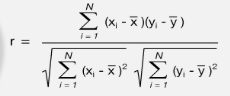

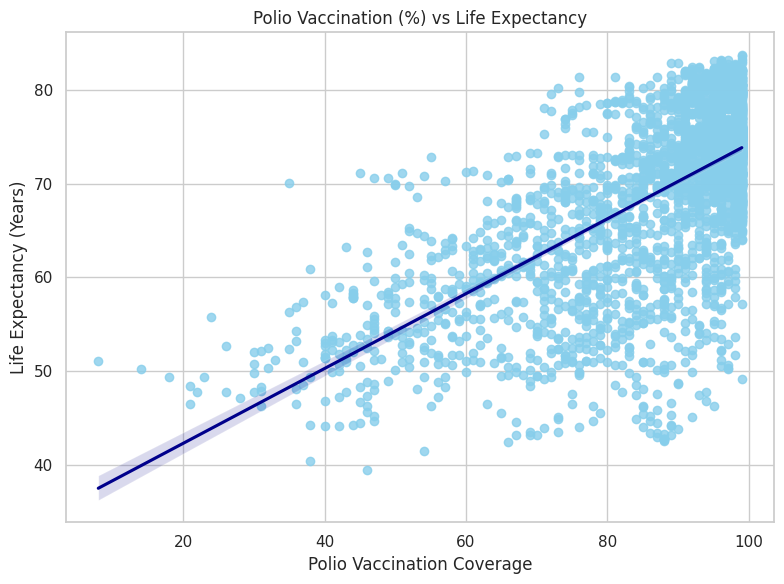

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Polio', y='Life_expectancy', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'darkblue'})
plt.title('Polio Vaccination (%) vs Life Expectancy')
plt.xlabel('Polio Vaccination Coverage')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

We selected the Polio vaccination coverage (%) as a feature to analyze its relationship with Life Expectancy. The Pearson correlation coefficient between Polio and Life Expectancy was found to be 0.6412, which indicates a strong positive linear relationship. This means that as Polio vaccination rates increase in a country, life expectancy tends to rise as well. The correlation makes logical sense: vaccination reduces the spread of preventable diseases, which directly improves public health outcomes and longevity.

The coefficient of determination (R²) for this relationship is approximately 0.4112, which means that about 41% of the variation in life expectancy across countries can be statistically explained by differences in Polio vaccination rates. This is a substantial portion, especially considering life expectancy is influenced by many factors.

It emphasizes the critical role of immunization programs in public health and suggests that investment in vaccination campaigns could significantly impact national and global health outcomes.

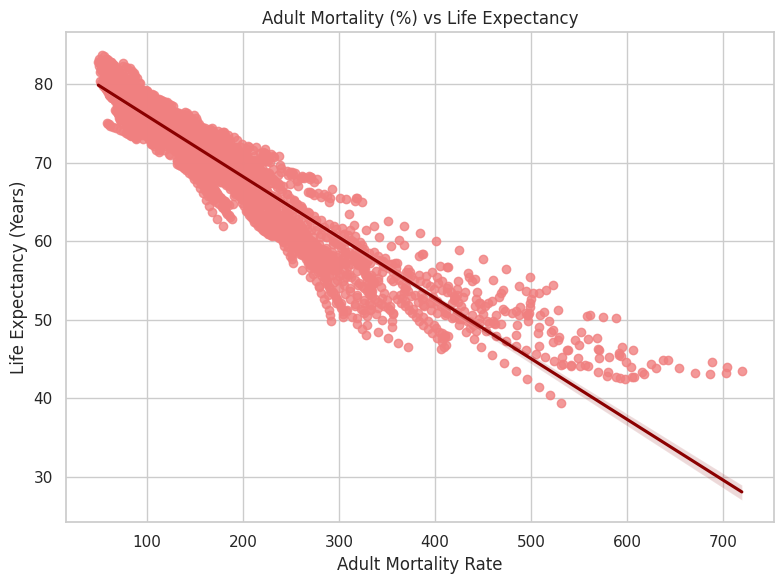

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Adult_mortality', y='Life_expectancy', scatter_kws={'color': 'lightcoral'}, line_kws={'color': 'darkred'})
plt.title('Adult Mortality (%) vs Life Expectancy')
plt.xlabel('Adult Mortality Rate')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above reveals a very strong negative linear relationship between Adult Mortality and Life Expectancy, with a correlation coefficient of -0.9454. This is the strongest correlation observed in the dataset, indicating that countries with higher adult mortality rates consistently report lower life expectancies. The regression line slopes downward sharply, and the points are tightly clustered around it, showing a clear and consistent pattern.

The coefficient of determination (R²) is approximately 0.89, which means that 89% of the variation in life expectancy across countries can be explained by adult mortality rates alone. This highlights the critical role of adult health and survival in shaping a country’s average lifespan. High adult mortality is typically associated with limited access to medical care, poor health infrastructure, high prevalence of diseases, and socio-economic challenges — all of which directly impact how long people live.

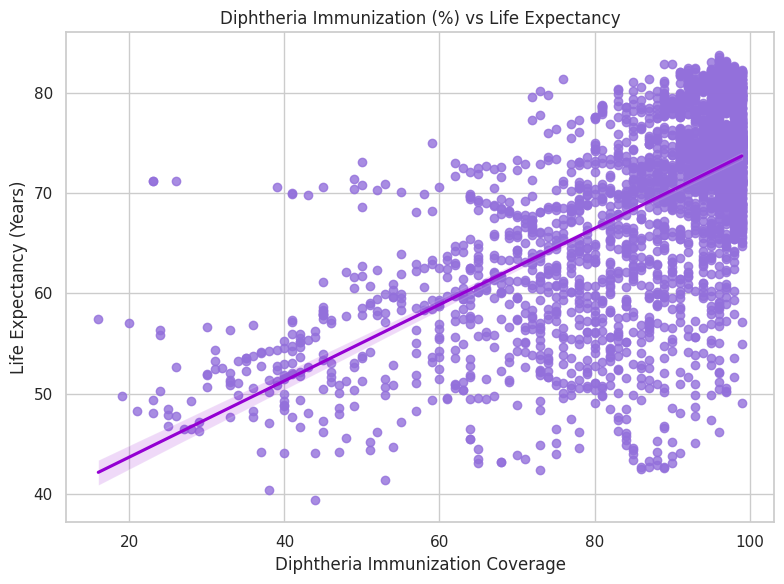

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Diphtheria', y='Life_expectancy', scatter_kws={'color': 'mediumpurple'}, line_kws={'color': 'darkviolet'})
plt.title('Diphtheria Immunization (%) vs Life Expectancy')
plt.xlabel('Diphtheria Immunization Coverage')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above illustrates a strong positive relationship between Diphtheria immunization coverage (%) and Life Expectancy, with a correlation coefficient of 0.6275. This means that countries with higher Diphtheria vaccination rates tend to have significantly higher life expectancy. The regression line confirms this upward trend, and the distribution of points suggests consistency across different regions.

The coefficient of determination (R²) for this relationship is approximately 0.39, indicating that about 39% of the variation in life expectancy can be explained by Diphtheria immunization rates alone. This reinforces the importance of widespread access to childhood vaccines in improving public health and reducing mortality rates. The relationship is especially relevant for developing nations, where expanding immunization programs can have a direct and measurable impact on population health and lifespan.

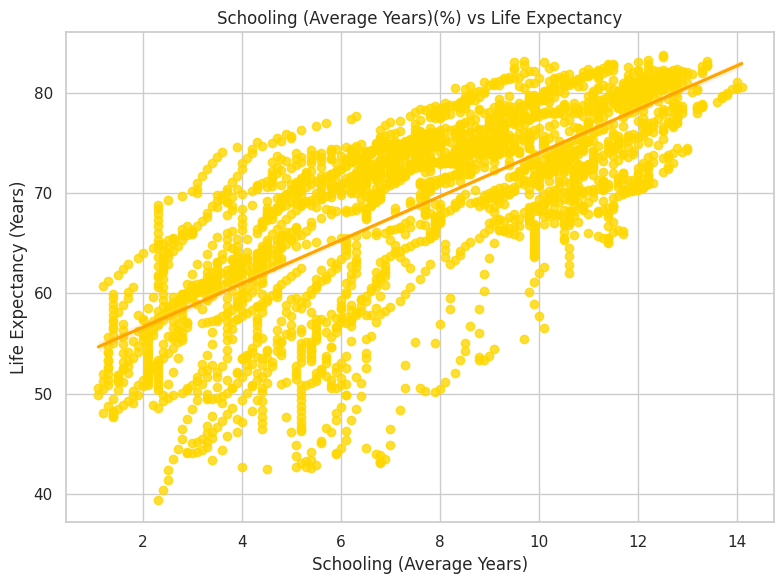

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Schooling', y='Life_expectancy', scatter_kws={'color': 'gold'}, line_kws={'color': 'orange'})
plt.title('Schooling (Average Years)(%) vs Life Expectancy')
plt.xlabel('Schooling (Average Years)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows a strong positive linear relationship between average years of schooling and Life Expectancy, with a correlation coefficient of 0.7325 — the highest among all variables in this dataset. This indicates that countries where people tend to spend more years in school also tend to have significantly higher life expectancies.

The coefficient of determination (R²) is approximately 0.54, meaning that 54% of the variance in life expectancy can be explained by differences in schooling levels. This is a substantial portion, underscoring the critical role of education in public health. Education improves awareness about hygiene, nutrition, disease prevention, and healthcare utilization. Additionally, better-educated populations often enjoy higher incomes and more stable socio-economic conditions, which further enhance health outcomes. These findings highlight schooling as a key long-term investment for improving both quality of life and lifespan

## Conclusion
At the outset of our project, we posed several important questions: What is the average global life expectancy? What factors most strongly influence it? And how can this data help improve public health outcomes across nations?

Through detailed statistical analysis, we found that the average global life expectancy is approximately 68.86 years, with the majority of countries clustering between 65 and 80 years. This confirmed our initial expectation of a moderately high average but also highlighted inequalities, especially among countries with lower immunization coverage or education levels.

In addressing the second part of our inquiry—which variables drive changes in life expectancy—we found robust positive correlations with schooling, GDP per capita, and vaccination coverage (Polio and Diphtheria), while adult mortality and infant deaths emerged as strong negative predictors. These findings offer data-driven answers to the questions we set out to explore and provide actionable insights for public health organizations and global development agencies. Our conclusions emphasize that improving access to education, healthcare, and vaccinations can have a direct and measurable impact on life expectancy, thereby informing strategies for building healthier and longer-living populations.

This report provides data-driven insights to support decision-makers in formulating impactful global health strategies.

## References

World Health Organization. (2024). Global Health Observatory Data. Retrieved from https://www.who.int/data/gho

United Nations. (n.d.). UN Data. Retrieved from https://data.un.org

The Pandas Development Team. (n.d.). Pandas documentation. Retrieved from https://pandas.pydata.org

The Seaborn Development Team(n.d.). Seaborn: Statistical data visualization. Retrieved from https://seaborn.pydata.org

Matplotlib documentation. Retrieved from https://matplotlib.org

University of Illinois Urbana-Champaign. (n.d.). Exploratory data analysis: Quartiles and box plots. Retrieved from https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Quartiles-and-Box-Plots/

 Life expectancy WHO (updated) (2023). [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

## Contributions

**Krish Patel** - Data Description & Storytelling:
Krish found the dataset and provided an overview of its structure and significance. He outlined the main questions our analysis aims to answer, proposed a suitable title, identified the target audience, and discussed the value this analysis could offer.

**Dhruv Chotalia** - Statistical Analysis:
Dhruv selected Life Expectancy as the key variable and performed graphical (histogram, box plot) and numerical (mean, median, mode, variance, etc.) analysis. He interpreted the results and compared the graphical and numerical findings in detail.

**Navdisha Bhakri** - Sampling & Confidence Intervals:
Navdisha drew a 10% random sample and repeated the analysis on it. She also calculated and interpreted 75%, 85%, and 95% confidence intervals for the population mean.

**Mitkumar Patel** - Hypothesis Testing & Correlation:
MitKumar developed a null hypothesis, tested it using the data, and explained the outcome. He also calculated and interpreted correlation coefficients and coefficients of determination.

**Rudra Patel** - Secondary Variable & Final Visualizations:
Rudra analyzed a second variable related to life expectancy and calculated correlation metrics. He also created and explained the final set of graphs used in the report.



## Attestation
By putting our names here and submitting the files required for this assignment, we declare that all work is our own. We agree to abide by Seneca's Academic Integrity Policy. We understand any violation of academic integrity will be subject to the penalties outlined in the policy. We also affirm that we have not copied any part of this assignment, manually or electronically, from any other source (including websites and generative AI tools) unless specified as references and have not distributed this work to other students.

**Date**: April 4, 2025  
**Student Names**:

Dhruv Chotalia

Krish Patel

Navdisha Bhakri

Rudra Patel

Mitkumar Patel